In [1]:
import re
import numpy as np
import pandas as pd
from tqdm import tqdm
from konlpy.tag import Okt
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import  Sequential,load_model
from tensorflow.keras.layers import Dense, Dropout,Embedding, Dense, LSTM,BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint,TensorBoard

In [2]:
import pickle
with open("data.pickle","rb") as fr:
    전처리_된_데이터 = pickle.load(fr)

In [3]:
train_inputs=전처리_된_데이터['학습_데이터']
train_outputs=전처리_된_데이터['학습_결과']
test_inputs=전처리_된_데이터['태스트_데이터']
test_outputs=전처리_된_데이터['태스트_결과']
val_inputs=전처리_된_데이터['검증_데이터']
val_outputs=전처리_된_데이터['검증_결과']
token=전처리_된_데이터['토큰']
w_n=전처리_된_데이터['단어수']
w_l=전처리_된_데이터['입력길이']

In [4]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5,restore_best_weights=True)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)
t_bd=TensorBoard(log_dir="logs")

In [5]:
model = Sequential()
model.add(Embedding(w_n, 128))
model.add(BatchNormalization())
model.add(LSTM(128,dropout=0.5,return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(256,dropout=0.5,return_sequences=True))
model.add(BatchNormalization())
model.add(LSTM(128,dropout=0.5))
model.add(Dense(1, activation='sigmoid'))

In [6]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
history = model.fit(train_inputs, train_outputs, epochs=15, callbacks=[es, mc,t_bd], batch_size=60,validation_data=(val_inputs,val_outputs))

Epoch 1/15
927/927 [==============================] - 192s 203ms/step - loss: 0.5457 - acc: 0.7169 - val_loss: 0.4776 - val_acc: 0.7775

Epoch 00001: val_acc improved from -inf to 0.77754, saving model to best_model.h5
Epoch 2/15
927/927 [==============================] - 191s 206ms/step - loss: 0.4263 - acc: 0.8061 - val_loss: 0.4553 - val_acc: 0.7875

Epoch 00002: val_acc improved from 0.77754 to 0.78748, saving model to best_model.h5
Epoch 3/15
927/927 [==============================] - 186s 201ms/step - loss: 0.3734 - acc: 0.8354 - val_loss: 0.4730 - val_acc: 0.7862

Epoch 00003: val_acc did not improve from 0.78748
Epoch 4/15
927/927 [==============================] - 190s 205ms/step - loss: 0.3330 - acc: 0.8545 - val_loss: 0.5220 - val_acc: 0.7838

Epoch 00004: val_acc did not improve from 0.78748
Epoch 5/15
927/927 [==============================] - 189s 204ms/step - loss: 0.3002 - acc: 0.8721 - val_loss: 0.5523 - val_acc: 0.7800

Epoch 00005: val_acc did not improve from 0.7874

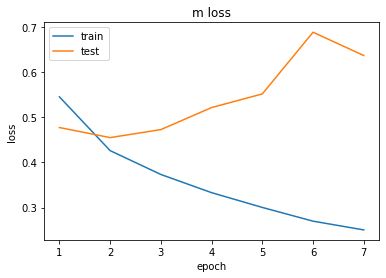

In [7]:
epochs = range(1, len(history.history['acc']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('m loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [8]:
model.evaluate(test_inputs,test_outputs)[1]

930/930 [==============================] - 39s 42ms/step - loss: 0.4641 - acc: 0.7839


0.7839282155036926

In [14]:
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 13812), started 0:05:41 ago. (Use '!kill 13812' to kill it.)